In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d_f = pd.read_csv('Book-01.csv')

In [4]:
df = d_f[['Business Travel', 'CF_age band', 'CF_attrition label','Gender','Marital Status']]

In [5]:
df.head()

,Business Travel,CF_age band,CF_attrition label,Gender,Marital Status
0,Travel_Rarely,35 - 44,Ex-Employees,Female,Single
1,Travel_Frequently,45 - 54,Current Employees,Male,Married
2,Travel_Rarely,35 - 44,Ex-Employees,Male,Single
3,Travel_Frequently,25 - 34,Current Employees,Female,Married
4,Travel_Rarely,25 - 34,Current Employees,Male,Married


In [6]:
def atr_lab(at_lb):
  if at_lb == 'Ex-Employees':
    return 'Yes'
  else:
    return 'No'

In [7]:
df['CF_attrition label'] = df['CF_attrition label'].apply(atr_lab)

C:\Users\Bilawal\AppData\Local\Temp\ipykernel_8296\796825815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CF_attrition label'] = df['CF_attrition label'].apply(atr_lab)


In [8]:
df.head()

,Business Travel,CF_age band,CF_attrition label,Gender,Marital Status
0,Travel_Rarely,35 - 44,Yes,Female,Single
1,Travel_Frequently,45 - 54,No,Male,Married
2,Travel_Rarely,35 - 44,Yes,Male,Single
3,Travel_Frequently,25 - 34,No,Female,Married
4,Travel_Rarely,25 - 34,No,Male,Married


In [9]:
df['CF_attrition label'].value_counts()

CF_attrition label
No     1233
Yes     237
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'Category':
        df[col] = LabelEncoder().fit_transform(df[col])

C:\Users\Bilawal\AppData\Local\Temp\ipykernel_8296\2854025883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Bilawal\AppData\Local\Temp\ipykernel_8296\2854025883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Bilawal\AppData\Local\Temp\ipykernel_8296\2854025883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [12]:
df.head()

,Business Travel,CF_age band,CF_attrition label,Gender,Marital Status
0,2,1,1,0,2
1,1,2,0,1,1
2,2,1,1,1,2
3,1,0,0,0,1
4,2,0,0,1,1


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = X = df.drop('CF_attrition label',axis=1)
y = df['CF_attrition label']

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [17]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[246   0]
 [ 47   1]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       1.00      0.02      0.04        48

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.84      0.77       294



In [21]:
from sklearn.tree import plot_tree

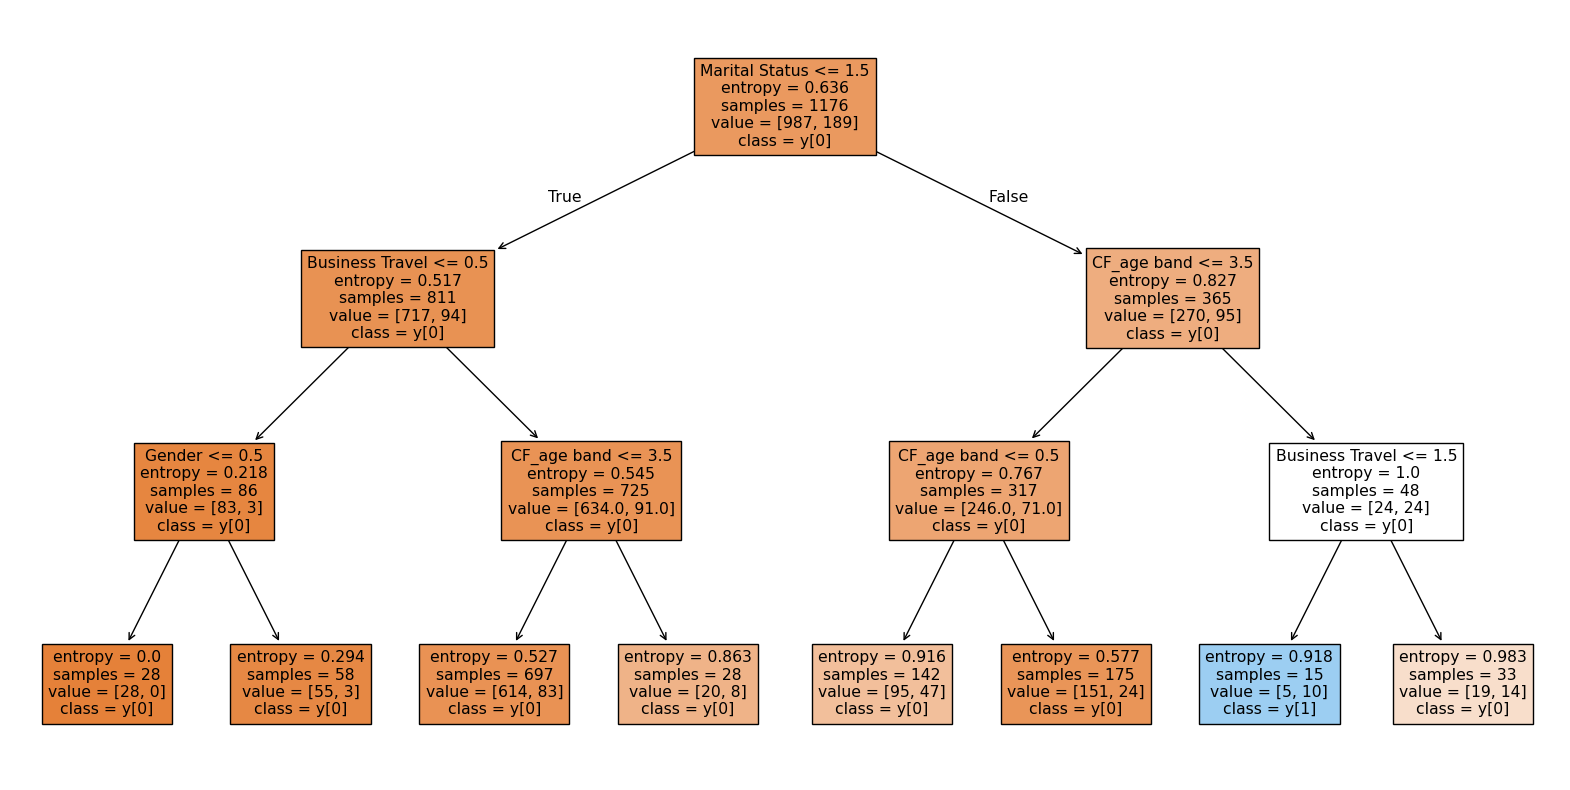

In [22]:
plt.figure(figsize=(20,10))
plot_tree(model,filled=True, feature_names = X_train.columns,class_names = True)
plt.show()